## Goal
The mean MSE of GTEx and GTEx-simulation seems to be very big. I want to find out what is going on...

## Some findings
* For GTEx The worst fit contribute `176723` to the MSE (average!) 
* This is probably because of some very big counts: our model fit to its scale but still the difference is huge
* The hist of MSE across genes follow similar shape as that of counts across genes (basically big counts correspond to bad fits)

In [1]:
import pickle
import numpy as np
from matplotlib import pyplot as plt


In [2]:
def MSE_matrix(X,Lam):
    return np.square((X - Lam))

## GTEx-sim

In [4]:
data_dir = "../../topics-simulation-bigdata/output/"

In [6]:
read_counts_file   = "gtex_simulation_nnlm.csv"
gtex_sim = np.loadtxt(open(data_dir + read_counts_file, "rb"), delimiter=",", skiprows=0)
gtex_sim.shape

(11688, 55863)

In [5]:
loadings_file   = "gtexsim_F_loadings_rnmfhals.csv"
factors_file   = "gtexsim_F_factors_rnmfhals.csv"
F_sim = np.loadtxt(open(data_dir + factors_file, "rb"), delimiter=",", skiprows=0)
L_sim = np.loadtxt(open(data_dir + loadings_file, "rb"), delimiter=",", skiprows=0)

In [7]:
Lam_sim = F_sim.dot(L_sim.T)
mse_rnmf_sim = MSE_matrix(gtex_sim.T, Lam_sim)

In [8]:
np.mean(mse_rnmf_sim)

1015.6212375593987

In [9]:
np.median(mse_rnmf_sim)

0.5441848785452285

In [10]:
np.max(mse_rnmf_sim)

47663669.388004206

In [11]:
ind_sim = np.unravel_index(np.argsort(mse_rnmf_sim, axis=None), mse_rnmf_sim.shape)

In [12]:
greatest = 10
gtex_sim.T[ind_sim[0][-greatest:],ind_sim[1][-greatest:]]

array([ 3780467.,  3503863.,  2856429.,  7491775.,  2093253.,  4937994.,
        4776184.,  3803890.,  4021534., 19546623.])

In [13]:
Lam_sim[ind_sim[0][-greatest:],ind_sim[1][-greatest:]]

array([ 3775418.62837917,  3498759.77816944,  2851312.36781674,
        7496987.32375005,  2087971.63939819,  4943356.95057257,
        4781550.23246389,  3798119.59865696,  4028240.9107711 ,
       19539719.11200931])

## GTEx 

In [14]:
data_dir           = "../../topics_bigdata/output/"
read_counts_file   = "gtex.csv"
gtex = np.loadtxt(open(data_dir + read_counts_file, "rb"), delimiter=",", skiprows=0)
gtex.shape

(11688, 55863)

In [15]:
loadings_file   = "gtex_F_loadings_rnmfhals.csv"
factors_file   = "gtex_F_factors_rnmfhals.csv"
F_gtex = np.loadtxt(open(data_dir + factors_file, "rb"), delimiter=",", skiprows=0)
L_gtex = np.loadtxt(open(data_dir + loadings_file, "rb"), delimiter=",", skiprows=0)
Lam_gtex = F_gtex.dot(L_gtex.T)

In [16]:
mse_rnmf = MSE_matrix(gtex.T, Lam_gtex)

In [17]:
mse_rnmf.mean()

22745666.683582906

In [18]:
np.median(mse_rnmf)

3.5480157310621836

In [19]:
np.max(mse_rnmf)

115387511268542.1

In [20]:
ind_gtex = np.unravel_index(np.argsort(mse_rnmf, axis=None), mse_rnmf.shape)

#### The worst ten fits
Below show counts in GTEx and their corresponding fitted poisson mean

In [21]:
greatest = 10
gtex.T[ind_gtex[0][-greatest:],ind_gtex[1][-greatest:]]

array([ 5174470.,  5302598.,  5880654.,  5748742.,  5995900., 24666577.,
        1092863.,  7553520.,   611312., 12917097.])

In [22]:
Lam_gtex[ind_gtex[0][-greatest:],ind_gtex[1][-greatest:]]

array([  875334.68479551,   906000.01076567,  1399255.52278474,
        1039241.8229663 ,  1082657.09175621, 19459956.14731023,
        6300610.14044819,   658557.36816052,  8057828.81888516,
        2175239.09419329])

In [62]:
np.square(gtex.T[ind_gtex[0][-1],ind_gtex[1][-1]] - Lam_gtex[ind_gtex[0][-1],ind_gtex[1][-1]])/(gtex.shape[0]*gtex.shape[1])

176723.51811115595

## Comment:
The worst fit can contribute `176723` to MSE (average over n*p)!

#### best ten fits
Below show counts in GTEx and their corresponding fitted poisson mean

In [23]:
smallest = 10
gtex.T[ind_gtex[0][:smallest],ind_gtex[1][:smallest]]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [24]:
Lam_gtex[ind_gtex[0][:smallest],ind_gtex[1][:smallest]]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

## Comment:
The worst fit happen when the counts are pretty large. Our model manages to capture the strong signal (often in the same scale),but the loss is still great. So great that a single worst fit contributes `176723` to the MSE (average over n,p)!!!

## What are the bad fits in GTEx?

Let's look at the count with worst fit and see if it is an outlier

In [58]:
gtex.max()

27195665.0

In [60]:
print("worst fit has count: "+ str(gtex.T[ind_gtex[0][-1],ind_gtex[1][-1]]))
print("worst fit is gene: "+str(ind_gtex[0][-1]))
print("worst fit is sample: "+str(ind_gtex[1][-1]))

worst fit has count: 12917097.0
worst fit is gene: 5573
worst fit is sample: 8735


Text(0.5, 1.0, 'hist of gene that has worst fit')

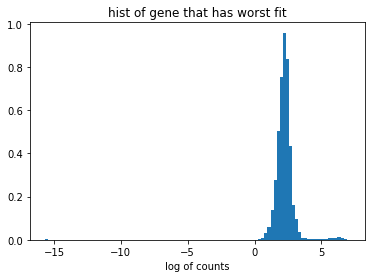

In [49]:
plt.hist(np.log10(gtex[:,ind_gtex[0][-1]] + np.finfo(float).eps), density=True, bins = 100)
plt.xlabel("log of counts")
plt.title("hist of gene that has worst fit")

Text(0.5, 1.0, 'hist of sample that has worst fit')

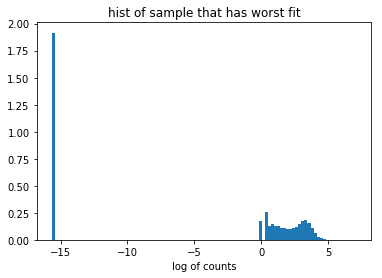

In [61]:
plt.hist(np.log10(gtex[ind_gtex[1][-1],:] + np.finfo(float).eps), density=True, bins = 100)
plt.xlabel("log of counts")
plt.title("hist of sample that has worst fit")

### Comment:
The worst count seems to be an outlier for that gene. 
Maybe we should remove those outliers? Or as in text mining, remove most frequent and least frequent words?

## Average MSE for genes

In [76]:
mse_ave_gene = mse_rnmf.mean(axis = 1)

Text(0.5, 1.0, 'hist of average MSE for genes')

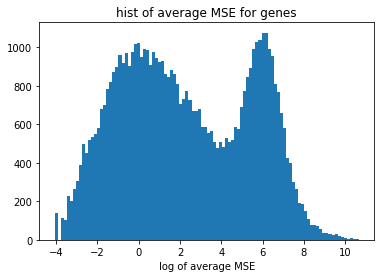

In [77]:
p = plt.hist(np.log10(mse_ave_gene), bins = 100)
plt.xlabel("log of average MSE")
plt.title("hist of average MSE for genes")

Text(0.5, 1.0, 'hist of log of counts in GTEx across genes')

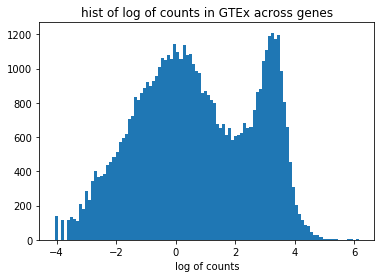

In [81]:
p = plt.hist(np.log10(gtex.mean(axis = 0)), bins = 100)
plt.xlabel("log of counts")
plt.title("hist of log of counts in GTEx across genes")

## Average MSE for samples

In [78]:
mse_ave_sample = mse_rnmf.mean(axis = 0)

Text(0.5, 1.0, 'hist of average MSE for samples')

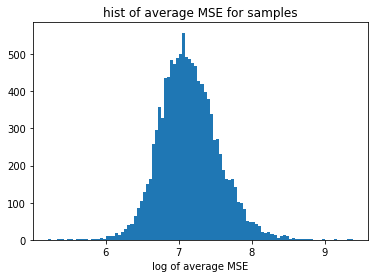

In [79]:
p = plt.hist(np.log10(mse_ave_sample), bins = 100)
plt.xlabel("log of average MSE")
plt.title("hist of average MSE for samples")

Text(0.5, 1.0, 'hist of log of counts in GTEx across samples')

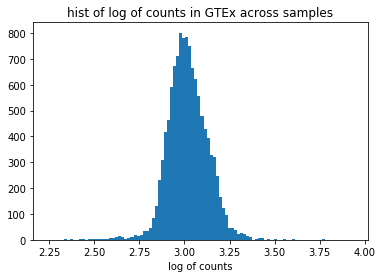

In [82]:
p = plt.hist(np.log10(gtex.mean(axis = 1)), bins = 100)
plt.xlabel("log of counts")
plt.title("hist of log of counts in GTEx across samples")

###  genes from the worst 1000 fit

In [70]:
print(np.unique(ind_gtex[0][-1000:]))
print("They are from {} genes".format(np.unique(ind_gtex[0][-1000:]).shape[0]))

[   32   371   665  1128  3090  3151  3154  3447  3959  4386  5234  5573
  6284  6392  6486  6487  6489  6577  7718  8111  8212  8651  8747  9710
  9830  9865 11344 12099 13187 13222 14256 14257 14258 16607 16966 16984
 17845 18500 18624 20199 20475 21077 21080 21891 21918 22488 22543 22816
 23587 23695 25335 26925 27138 29015 29018 29162 29489 29654 29946 30005
 30007 30051 30444 30527 30530 31338 31554 32503 33312 34129 34132 34136
 34145 34146 34154 34155 34168 34634 35256 36386 37309 37311 38468 38499
 38627 38761 38887 38899 38902 38906 41095 41304 41517 41712 42899 42961
 43700 43701 44744 44939 45160 45477 45989 47097 47864 48698 48729 49157
 49284 49285 49920 49921 50548 50677 54487 55240 55827 55831 55835 55844
 55847 55848 55853 55857 55860]
They are from 125 genes


### Samples from the worst 100 fit

In [71]:
print(np.unique(ind_gtex[1][-1000:]))
print("They are from {} samples".format(np.unique(ind_gtex[1][-1000:]).shape[0]))

[   29    47   112   137   346   468   621   673   751   803   805   813
   828   829   834   839   844   847   855   856   859   862   865   866
   867   868   869   878   882   885   891   892   903   908   909   910
   911   923   929   940   942   949   952   956   958   961   962   964
   969   971   972   975   978   985  1288  1398  1401  1485  1616  1633
  1930  2014  2073  2152  2167  2209  2226  2228  2404  2574  2714  2921
  2927  2965  2984  2986  3012  3019  3033  3039  3056  3069  3084  3116
  3131  3176  3297  3330  3342  3374  3409  3413  3416  3423  3424  3430
  3434  3444  3445  3455  3459  3464  3468  3472  3481  3483  3484  3492
  3493  3507  3512  3513  3519  3525  3556  3571  3576  3580  3581  3719
  3743  3800  3834  3874  3886  3894  3904  3923  3959  3970  3971  3972
  4045  4079  4181  4185  4237  4263  4270  4287  4299  4406  4433  4560
  4632  4645  4672  4675  4681  4697  4703  4733  4825  5020  5114  5145
  5217  5218  5237  5241  5246  5295  5309  5331  5

### Comment: it seems there are a few genes that are fitted poorly

### Q?
Is it a coincidence that many "bad" samples are close to each other in sequence?